In [5]:
import requests
import matplotlib.pyplot as plt
from time import time
#host = 'https://8d067d1e-81c7-435e-982f-3e5702dfd081.deepnoteproject.com'
host = 'http://0.0.0.0:8080'

In [6]:
# Get all the mac addresses
response = requests.get(host + '/devices')
if response.status_code == 200:
    mac_addresses = response.json()['mac_addresses']
    print(f'The mac addresses are {mac_addresses}.')
else:
    print('The server is offline.')
    exit()

The mac addresses are ['0x63f972a93377', '0x8bd09fbf175d'].


<Response [200]>


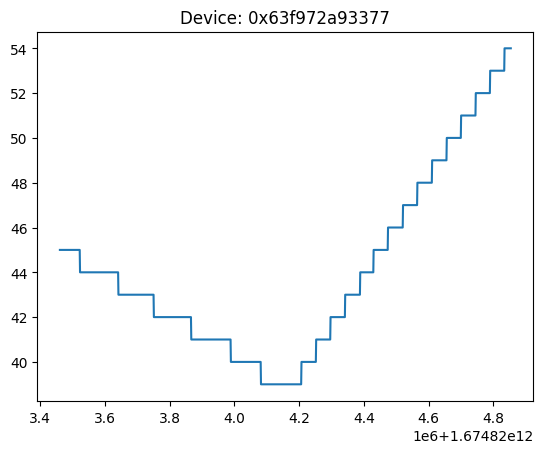

<Response [200]>


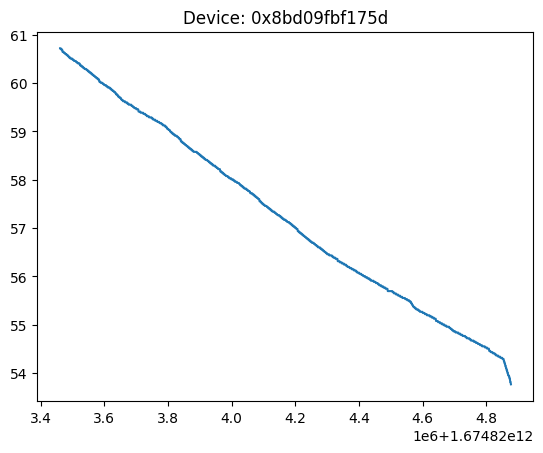

In [14]:
from_ = 0
to_ = int(time()*1000)

for mac_add in mac_addresses:
    response = requests.get(f"{host}/device/{mac_add}?from={from_}&to={to_}")
    if response.status_code == 200:
        print(response)
        timestamps = response.json()['timestamps']
        battery_levels = response.json()['battery_levels']
        plt.title(f'Device: {mac_add}')
        plt.plot(timestamps, battery_levels)
        plt.show()
    else:
        print('The server is offline.')
        exit()


In [4]:
mac_address_to_delete = mac_addresses[-1]
print(mac_address_to_delete)
# Delete todo item
response = requests.delete(host + f'/device/{mac_address_to_delete}')
if response.status_code == 200:
    print()
    print('Item deleted.')
else:
    exit()

0x8bd09fbf175d

Item deleted.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81f45795-723f-4142-b302-f9037f9c1cf7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>